In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 22
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['font.size'] = 22

# Advanced Chemistry Practical: Computational Chemistry

Welcome to the advanced chemistry pratical focusing on [computational chemistry](./README.md). Over the next four weeks you will: 
- gain a understanding of, and familiarity, with molecular dynamics simulations.
- learn how molecular dynamics simulations are performed in practice.
- use molecular dynamics simulations to study the solid state materials, such as batteries and solar cells. 
- rationalise the results of the molecular dynamics simulations in terms of physical chemistry you are familiar with. 

For more details about the learning objectives of this practical, checkout the [lesson plan](https://github.com/symmy596/Advanced_Practical_Chemistry_Teaching/blob/master/LESSONPLAN.md) online. This session will also make use of some of the Python and Jupyter skills that you were introduced to in the first and second year computational laboratory, if you feel that these are not fresh in your mind it might be worth looking back at your work from those previous years. 

This first session will focus on an introduction to **classical molecular dynamics simulation**, if you took the "introduction to Computational Chemistry" (CH20238) module last year this **will** involve some revision. However, it is **important** that you work through all of this introduction as it should make the basis for the methodology section of your report. That said, as with all work that you do this notebook should **not** be your exclusive source of background information about molecular dynamics. Below is a non-exhaustive list of books in the library that can be used for more information. 

- Harvey, J. (2017). *Computational Chemistry*. Oxford, UK. Oxford University Press
    - Bath Library Shelf Reference: 542.85 HAR
- Grant, G. H. & Richards, W. G. (1995). *Computational Chemistry*. Oxford, UK. Oxford University Press
    - Bath Library Shelf Reference: 542.85 GRA
- Leach, A. R. (1996). *Molecular modelling: principles and applications*. Harlow, UK. Longman
    - Bath Library Shelf Reference: 541.6 LEA
- Frenkel, D. & Smit, B. (2002). *Understanding molecular simulation: from algorithms to applications*. San Diego, USA. Academic Press
    - Bath Library Shelf Reference: 541.572.6 FRE
    - Note: This book is a personal favourite, great if you love maths and algorithms but is particularly **hardcore**.
- Allen, M. P. & Tildesley, D. J. (1987). *Computer simulation of liquids*. Oxford, UK. Clarendon Press
    - Bath Library Shelf Reference: 532.9 ALL
    - Note : This is also pretty **hardcore**. 
    
## Introduction to classical molecular dynamics

**Classical molecular dynamics** is one of the most commonly applied techniques in computational chemistry, in particular for the study of large systems such as protein, polymers, batteries materials, and solar cells. In classical molecular dynamics, as you would expect, we use **classical methods** to study the **dynamics** of **molecules**. 

### Classical methods

The term **classical methods** is used to distinguish these from quantum mechanical methods, such as the Hartree-Fock method or Møller–Plesset perturbation theory. In these classical methods, the quantum mechanical **weirdness** is not present, which has a significant impact on the calculation time. The need for quantum mechanics is removed by integrating over all of the electronic orbitals and describing the atom as a fixed electron distribution. This **simplification** has some drawbacks, classical methods are only suitable for the study of molecular ground states, limiting the ability to study reactions. Furthermore, it is necessary to determine some way to **describe** this electron distribution. 

In practice, the model used to describe the electron distribution is usually **isotropic**, e.g. a sphere, with the electron sharing bonds between the atoms described as springs. 

<center>
    <br>
    <img src="./figures/fig001.png" width="200px">
    <i>Figure 1. A pictorial example of the models used in a classical method.</i>
    <br>
</center>

The aim of all chemistry is to understand the **energy** of the given system, therefore we must parameterise the **models** of our system in terms of the energy. For a molecular system, the energy is defined in terms of bonded and non-bonded interactions, 

$$ E_{\text{tot}} = E_{\text{bond}} + E_{\text{angle}} + E_{\text{dihedral}} + E_{\text{non-bond}} $$

where, $E_{\text{bond}}$, $E_{\text{angle}}$, and $E_{\text{dihedral}}$ are the energies associated with all of the bonded interactions, and $E_{\text{non-bond}}$ is the energy associated with all the of the non-bonded interactions. In this project, we will be focusing on **atomic ionic solids**, where there are no covalent bonds between the atoms, therefore in this introduction we will focus on the **non-bonded interactions**. 

The parameterisation of the models involves the use of **mathematical functions** to describe the **physical relationship being modelled**. For example, one of the two non-bonded interactions is the electrostatic interaction between two charged particles, to model this interaction we use **Coulomb's law**, which was first defined in 1785, 

$$ E_{\text{Coulomb}}(r_{ij}) = \frac{1}{4\pi\epsilon_0}\frac{q_iq_je^2}{r_{ij}}, $$ 

where, $q_i$ and $q_j$ are the charges on the particles, $e$ is the charge of the electron, $\epsilon$ is the dielectric permitivity of vacuum, and $r_{ij}$ is the distance between the two particles. 

**In the cell below**, we will define a function which models the electrostatic interaction using Coulomb's law, before plotting it. 

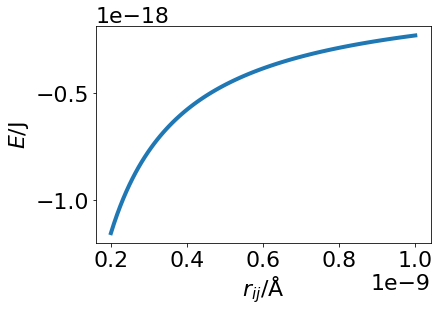

In [19]:
from scipy.constants import e, epsilon_0
from math import pi

def Coulomb(qi, qj, r):
    return (qi * qj * e ** 2.) / (4. * pi * epsilon_0 * r)

r = np.linspace(2e-10, 10e-10, 100)
plt.plot(r, Coulomb(1, -1, r))
plt.xlabel(r'$r_{ij}$/Å')
plt.ylabel(r'$E$/J')
plt.show()

Note that if $q_i$ and $q_j$ have different signs (e.g. are oppositely charged) then the value of $E_{\text{Coulomb}}$ will **always** be less then zero (e.g. attractive). It is clear that this mathematical function has clear routes in the physics of the system. 

However, the other component of the non-bonded interaction is less well defined. This is the **van der Waals** interaction, which encompasses both the attractive London dispersion effects and the repulsive Pauli exclusion principle. 